# Gas Evolution

In contrast to dust evolution `DustPy` solves gas evolution with an implicit scheme, because implicit schemes return smoother surface density profiles. Explicit schemes can introduces tiny ripples in the gas surface density, which induces ripples in the $\eta$ pressure gradient parameters. Since the radial dust velocity is very sensitive to $\eta$, especially the larger particles, this could lead to dust accumulations that are purely numerical, but not physical.

`DustPy` solves by default the following equation for a viscously evolving disk

$\frac{\partial}{\partial t} \Sigma_\mathrm{d} + \frac{1}{r}\frac{\partial}{\partial r} \left( r\Sigma_\mathrm{g}v_\mathrm{rad} \right) = S_\mathrm{ext}$.

Where the radial gas velocity is given by

$v_\mathrm{rad} = Av_\mathrm{visc} + 2B\eta v_\mathrm{K}$.

$A$ and $B$ are the dust backreaction coefficients `Simulation.dust.backreaction` and the viscous accretion velocity is given by

$v_\mathrm{visc} = -\frac{3}{\Sigma_\mathrm{g}\sqrt{r}} \frac{\partial}{\partial r} \left( \Sigma_\mathrm{g} \nu \sqrt{r} \right)$

with the kinematic viscosity $\nu$.

$S_\mathrm{ext}$ are the external source/loss terms, e.g. due to infall onto the disk or accretion of gas onto a planet.

In [1]:
from dustpy import Simulation
sim = Simulation()
sim.ini.grid.Nr = 15
sim.initialize()

## Hydrodynamics

The matrix equation that is solved for gas evolution is given by

$\left( \mathbb{1} - \Delta t\, \mathbb{J} \right) \cdot \vec{\Sigma}_\mathrm{g}^{n+1} = \vec{\Sigma}_\mathrm{g}^{n} + \Delta t\, \vec{S}_\mathrm{ext}$.

The Jacobian $\mathbb{J}$ is a tri-diagonal matrix, since the grid cells only interact with their neighbouring grid cells.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Structure of Jacobian $\\mathbb{J}$')

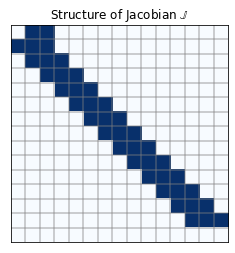

In [3]:
plt.imshow(np.where(sim.gas.Sigma.jacobian() != 0., 1., 0.), cmap="Blues")
plt.hlines(np.arange(1., sim.grid.Nr)-0.5, -0.5, sim.grid.Nr-0.5, color="gray", alpha=0.5)
plt.vlines(np.arange(1., sim.grid.Nr)-0.5, -0.5, sim.grid.Nr-0.5, color="gray", alpha=0.5)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Structure of Jacobian $\mathbb{J}$")

A notable exception are the first and the last row, which are used to set the boundary conditions. They require one additional element to the right, respectively left, to set the gradients if needed.

In [4]:
sim.gas.Sigma.jacobian()[0, :]

array([ 0.00000000e+00,  6.24811891e-08, -1.94291334e-08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [5]:
sim.gas.Sigma.jacobian()[-1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Turning off Hydrodynamics

## External Sources

## Turning off Gas Evolution